In [8]:
%pylab inline
import h5py
import sys
import numpy 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Populating the interactive namespace from numpy and matplotlib


In [9]:
def dispImage(img,min=0,max=1024, log=True):
    ## image plotter ##
      plt.ion()
      if img is None: return
      figure = plt.figure(figsize=(16,4))
      if log:
          img = numpy.log(img)
      pltimg = img.astype(numpy.float32)
      im = plt.imshow(pltimg,cmap=cm.hot)
      plt.colorbar()
      im.set_clim(min,max)
      plt.draw()
      #raw_input("press enter to continue")
      
      return figure

In [10]:
class ImageReadException(Exception):
    def __init__(self, value):
        self.value = value
    def __str__(self):
        return repr(self.value)

In [11]:
def createLUT(hdf5File):
    LUT = {}
    entry = hdf5File['entry']
    
    for datalink in list(entry['data']):
        if not(datalink[0:4] == 'data'): 
            continue
        
        ### open the link ###
        try:
            data = entry['data'][datalink] 
            #print (data)
        except KeyError as exception: ### cannot open link, probably file does not exist
            continue

        
        ### read the image_nr_low and image_nr_high attributes ###
        image_nr_low  = data.attrs['image_nr_low']
        image_nr_high = data.attrs['image_nr_high']

        for imgNr in range(image_nr_low-1, image_nr_high):
            LUT[imgNr] = (datalink, imgNr-image_nr_low)
    
    return LUT

In [12]:
def readImage(imgNr, LUT, hdf5File):
    datalink = ''
    try:
        (datalink, imageNrOffset) = LUT[imgNr]
    except KeyError as e: 
        raise ImageReadException('imgNr ({0}) out of range'.format(imgNr))
    
    
    data = hdf5File['entry']['data'][datalink]
    ### use slicing access to get images with image number imageNrOffset ###
    image = data[imageNrOffset, : , : ] ## z / y / x
    #print(image)
    intensitymatrix = data[-1, :, :]  ## z / y / x
    #print(image.shape)
    #print(image[590:600,450:460]) #row first, then column
    return image ## is a numpy array

In [13]:
masterFilename = '/Users/charlespan/data/calibrate_012_002_master.h5'
hdf5File = h5py.File(masterFilename, 'r')

######### NEXUS HEADER ITEMS #########

### example: list all entries in /entry/instrument/detector ###
detector = hdf5File['entry']['instrument']['detector']
#print ("entries in detector: ", list(detector))
#print (list(hdf5File['entry']))
#print ((hdf5File['entry']['data']['data_000001']))
### example: get the gain settings ###
# gain_setting = detector['gain_setting']
# print "gain setting: ", gain_setting[0] ### remark: In NeXus, data is always
                                        ### stored as arrays, even if the data is scalar.

In [14]:
######### IMAGES #########

### first create the LUT to find the path to the images ###
    
LUT = createLUT(hdf5File)
imgNr = 0

image = readImage(imgNr, LUT, hdf5File)
    
### do whatever you want with the image ###
### e.g. draw the image ###
    
#if mpl:
     #dispImage(image,  max=10, log=False)

In [15]:
masterFilename1 = '/Users/charlespan/data/calibrate_012_002_master.h5'
hdf5File1 = h5py.File(masterFilename1, 'r')
print(hdf5File1)
data = hdf5File1

<HDF5 file "calibrate_012_002_master.h5" (mode r)>


/Users/charlespan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


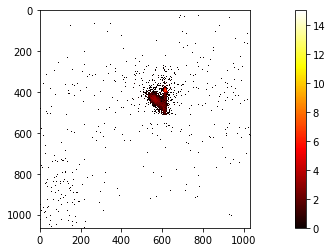

In [17]:
def main():
    masterFilename = '/Users/charlespan/data/calibrate_012_002_master.h5'
    hdf5File = h5py.File(masterFilename, 'r')
    #print("Keys: %s" % hdf5File.keys())
    #a_group_key = hdf5File.keys()[0]
    #data = list(hdf5File[a_group_key])
    #print (data)


    ######### NEXUS HEADER ITEMS #########

    ### example: list all entries in /entry/instrument/detector ###
    detector = hdf5File['entry']['instrument']['detector']
    #print ("entries in detector: ", list(detector))
    
    ### example: get the gain settings ###
    #gain_setting = detector['gain_setting']
    #print "gain setting: ", gain_setting[0] ### remark: In NeXus, data is always
                                            ### stored as arrays, even if the data is scalar. 
    




    ######### IMAGES #########

    ### first create the LUT to find the path to the images ###
    
    LUT = createLUT(hdf5File)
    #print (LUT[0])
    ### then read the image imgNr ###
    imgNr = 0

    flatdata = readImage(imgNr, LUT, hdf5File)
    #make_chart(image)
    
    #print(image)
    ### do whatever you want with the image ###
    ### e.g. draw the image ###
    
    if mpl:
        dispImage(image,  max=15, log=True)




if __name__=='__main__':
    main()

In [ ]:
import h5py
from h5py import h5z
import numpy as np

print (h5py.version.info)


filters = { 'gzip': h5z.FILTER_DEFLATE,
            'szip': h5z.FILTER_SZIP,
            'shuffle': h5z.FILTER_SHUFFLE,
            'lzf': h5z.FILTER_LZF,
            'so': h5z.FILTER_SCALEOFFSET,
            'f32': h5z.FILTER_FLETCHER32, }
            
print ('encode %d decode %d\n' % (h5z.FILTER_CONFIG_ENCODE_ENABLED,
                               h5z.FILTER_CONFIG_DECODE_ENABLED ))
                               
for name, filter in filters.items():
    print (name)
    print ('    ', h5z.filter_avail(filter))
    if h5z.filter_avail(filter):
        print ('    ', h5z.get_filter_info(filter))
    
with h5py.File('debug.hdf5', 'w') as f:
    dset = f.create_dataset('x', (10,), compression='gzip')
    dset[...] = np.arange(10)
    print (dset[...])